In [2]:
from pyspark.sql import SparkSession
spark=(SparkSession.builder.appName("ML_PIPELINE")\
       .config("hive.metastore.uris","thrift://ip-10-1-2-24.ap-south-1.compute.internal:9083")\
       .enableHiveSupport().getOrCreate())

In [3]:
spark

In [4]:
emp_df=spark.sql("select * from nls.employeess")

In [5]:
department_df=spark.sql("select * from nls.departments")


In [6]:
import pandas as pd

In [7]:
dept_emp_df=spark.sql("select * from nls.dept_emp")

In [8]:
dept_manager_df=spark.sql("select * from nls.dept_manager")

In [9]:
salaries_df=spark.sql("select * from nls.salaries")

In [10]:
title_df=spark.sql("select * from nls.title")

In [11]:

DF=emp_df.join(dept_emp_df,on="emp_no",how='left').join(department_df,on="dept_no",how="left").join(salaries_df,on="emp_no",how="left").join(title_df,emp_df.emp_title_id==title_df.title_id,"left")

In [72]:
##question no-02 A list showing the manager of each department with the following information: department number, department name, 
##the manager's employee number, last name, first name.

spark.sql("select departments.dept_no,departments.dept_name,dept_manager.emp_no,employees.first_name,employees.last_name from departments inner join dept_manager on departments.dept_no=dept_manager.dept_no  inner join employees on employees.emp_no=dept_manager.emp_no").show()

+-------+--------------------+------+-----------+------------+
|dept_no|           dept_name|emp_no| first_name|   last_name|
+-------+--------------------+------+-----------+------------+
|   d001|         "Marketing"|110022|  Margareta|  Markovitch|
|   d001|         "Marketing"|110039|   Vishwani|    Minakawa|
|   d002|           "Finance"|110085|       Ebru|       Alpin|
|   d002|           "Finance"|110114|      Isamu|  Legleitner|
|   d003|   "Human Resources"|110183|    Shirish|Ossenbruggen|
|   d003|   "Human Resources"|110228|    Karsten|     Sigstam|
|   d004|        "Production"|110303|  Krassimir|     Wegerle|
|   d004|        "Production"|110344|     Rosine|       Cools|
|   d004|        "Production"|110386|       Shem|      Kieras|
|   d004|        "Production"|110420|      Oscar|    Ghazalie|
|   d005|       "development"|110511|   DeForest|    Hagimont|
|   d005|       "development"|110567|       Leon|    DasSarma|
|   d006|"Quality Management"|110725|  Peternela|     O

In [12]:
DF.show(10,truncate=False)

+------+-------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|sex|hire_date |no_of_projects|last_performance_ratings|left1|last_date|dept_name         |salary|title_id|title             |
+------+-------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+
|10001 |d005   |e0003       |09-02-1953|Georgi    |Facello  |M  |6/26/1986 |9             |C                       |true |7/30/1994|development       |60117 |e0003   |Senior Engineer   |
|10002 |d007   |s0001       |06-02-1964|Bezalel   |Simmel   |F  |11/21/1985|8             |B                       |false|         |Sales             |65828 |s0001   |Staff             |
|10003 |d004   |e0003       |12-03-1959|Parto     |Bamford  |M  |

In [13]:
DF.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_ratings: string (nullable = true)
 |-- left1: boolean (nullable = true)
 |-- last_date: string (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)



In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [15]:
import pandas as pd

In [16]:
dataframe=DF.toPandas()

In [17]:
dataframe.isnull().sum()

emp_no                      0
dept_no                     0
emp_title_id                0
birth_date                  0
first_name                  0
last_name                   0
sex                         0
hire_date                   0
no_of_projects              0
last_performance_ratings    0
left1                       0
last_date                   0
dept_name                   0
salary                      0
title_id                    0
title                       0
dtype: int64

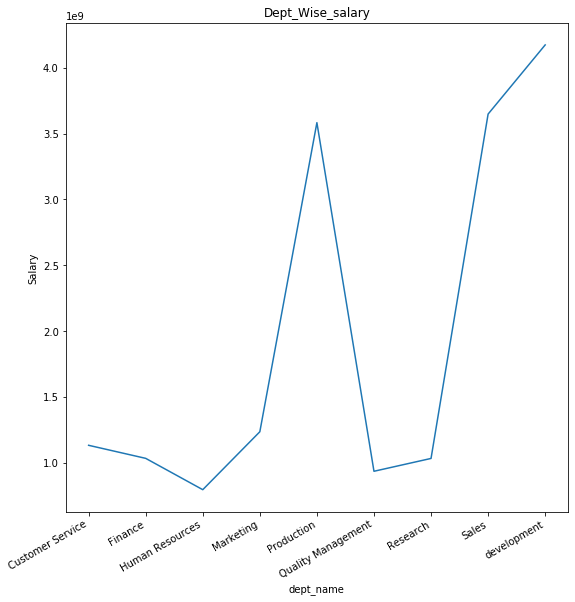

In [18]:
import numpy as np
salary_department=dataframe.groupby(["dept_name"])[("salary")].sum()
salary_department.plot(kind="line",figsize=(9,9))
plt.ylabel("Salary")
plt.title("Dept_Wise_salary")
plt.xticks(rotation=30,ha="right")

plt.show()

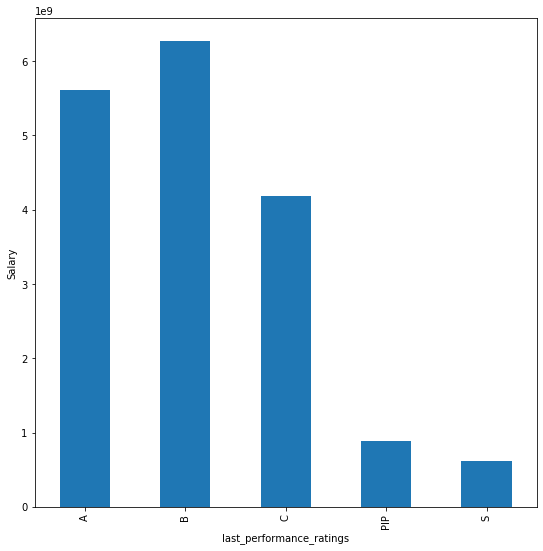

In [19]:
salary_project=dataframe.groupby("last_performance_ratings")["salary"].sum()
salary_project.plot(kind="bar",figsize=(9,9))
plt.ylabel("Salary")
plt.show()



[]

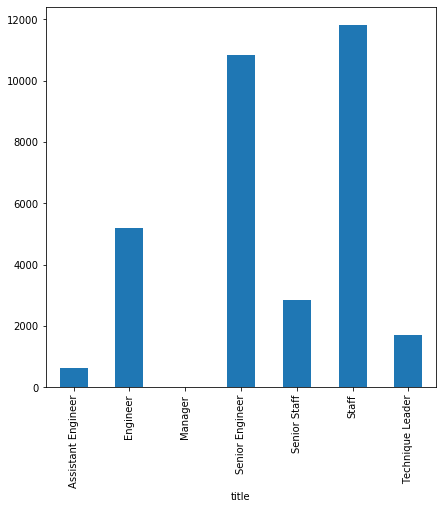

In [20]:
title_left=dataframe.groupby("title")["left1"].sum()
title_left.plot(kind="bar",figsize=(7,7))
plt.plot()

In [21]:
##catgeorical values 

numerical_feature=["salary","no_of_projects"]

categorical_feature=["dept_name","dept_no","title"]

In [22]:
##pivot table for salary department and title wise

pd.pivot_table(dataframe,values="salary",index=["no_of_projects"],columns=["dept_name"],aggfunc=np.sum)

dept_name,Customer Service,Finance,Human Resources,Marketing,Production,Quality Management,Research,Sales,development
no_of_projects,,,,,,,,,
1,114606319,104787499,77881179,124598953,359533282,93299107,99474854,362528382,416985877
2,115060937,104072704,77172327,123427748,349275288,93557241,103627908,363991080,420687034
3,113315115,104019987,82970467,117247628,361751467,91225031,102208520,358307516,424120719
4,112844691,102496055,81167280,125415259,357756285,91633031,102225890,366325447,411846251
5,115299239,99761198,79474131,121944687,360529309,93048230,101439055,370457216,409499587
6,112734012,104215104,82208885,124068157,359256149,96732602,100639271,363094024,416831191
7,111406049,102186426,75716215,127430812,361655634,94541853,110182679,359098560,418497046
8,110826933,102763712,81629049,127861589,352179330,90415241,102080742,367343587,418969178
9,114625773,103258469,76914847,121671218,364444916,97246899,104947114,365443202,417319652


In [23]:
from pyspark.ml.feature import StringIndexer,OneHotEncoderEstimator,VectorAssembler,PolynomialExpansion,VectorIndexer

In [24]:
##creating object of string indexer and converting the string value to indexer

SI_dept_name=StringIndexer(inputCol="dept_name",outputCol="dept_name_IDX")
SI_dept_no=StringIndexer(inputCol="dept_no",outputCol="dept_no_IDX")
SI_title=StringIndexer(inputCol="title",outputCol="title_IDX")


##tranform the data 


DF=SI_dept_name.fit(DF).transform(DF)
DF=SI_dept_no.fit(DF).transform(DF)
DF=SI_title.fit(DF).transform(DF)

In [25]:
DF.select("dept_name","dept_name_IDX","dept_no","dept_no_IDX","title","title_IDX").show()

+------------------+-------------+-------+-----------+------------------+---------+
|         dept_name|dept_name_IDX|dept_no|dept_no_IDX|             title|title_IDX|
+------------------+-------------+-------+-----------+------------------+---------+
|       development|          0.0|   d005|        0.0|   Senior Engineer|      1.0|
|             Sales|          2.0|   d007|        2.0|             Staff|      0.0|
|        Production|          1.0|   d004|        1.0|   Senior Engineer|      1.0|
|        Production|          1.0|   d004|        1.0|   Senior Engineer|      1.0|
|   Human Resources|          7.0|   d003|        7.0|             Staff|      0.0|
|       development|          0.0|   d005|        0.0|   Senior Engineer|      1.0|
|          Research|          4.0|   d008|        4.0|             Staff|      0.0|
|       development|          0.0|   d005|        0.0|Assistant Engineer|      5.0|
|Quality Management|          6.0|   d006|        6.0|   Senior Engineer|   

In [26]:
#creating object of OHE and providing the input cols and output cols


ohe=OneHotEncoderEstimator(inputCols=["dept_name_IDX","dept_no_IDX","title_IDX"],outputCols=["dept_name_vector","dept_no_vector","title_vector"])

##fitting the model to get vectors

DF=ohe.fit(DF).transform(DF)

In [27]:
DF.select("dept_name","dept_name_IDX","dept_name_vector","dept_no","dept_no_IDX","dept_no_vector","title","title_IDX","title_vector").show()

+------------------+-------------+----------------+-------+-----------+--------------+------------------+---------+-------------+
|         dept_name|dept_name_IDX|dept_name_vector|dept_no|dept_no_IDX|dept_no_vector|             title|title_IDX| title_vector|
+------------------+-------------+----------------+-------+-----------+--------------+------------------+---------+-------------+
|       development|          0.0|   (8,[0],[1.0])|   d005|        0.0| (8,[0],[1.0])|   Senior Engineer|      1.0|(6,[1],[1.0])|
|             Sales|          2.0|   (8,[2],[1.0])|   d007|        2.0| (8,[2],[1.0])|             Staff|      0.0|(6,[0],[1.0])|
|        Production|          1.0|   (8,[1],[1.0])|   d004|        1.0| (8,[1],[1.0])|   Senior Engineer|      1.0|(6,[1],[1.0])|
|        Production|          1.0|   (8,[1],[1.0])|   d004|        1.0| (8,[1],[1.0])|   Senior Engineer|      1.0|(6,[1],[1.0])|
|   Human Resources|          7.0|   (8,[7],[1.0])|   d003|        7.0| (8,[7],[1.0])|    

In [28]:
features_col=numerical_feature+["dept_name_vector","dept_no_vector","title_vector"]

In [29]:
assembler=VectorAssembler(inputCols=features_col,outputCol="features")

In [30]:
print(assembler)

VectorAssembler_6d71e92a9428


In [31]:
train_DF=assembler.transform(DF)

In [32]:
train_DF.show()

+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|last_performance_ratings|left1|last_date|         dept_name|salary|title_id|             title|dept_name_IDX|dept_no_IDX|title_IDX|dept_name_vector|dept_no_vector| title_vector|            features|
+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+
| 10001|   d005|       e0003|09-02-1953|    Georgi|    Facello|  M| 6/26/1986|             9|                       C| true|

In [33]:
train_DF=train_DF.withColumn("label",train_DF["left1"].cast("integer"))

In [34]:
train_DF.printSchema()

root
 |-- emp_no: integer (nullable = true)
 |-- dept_no: string (nullable = true)
 |-- emp_title_id: string (nullable = true)
 |-- birth_date: string (nullable = true)
 |-- first_name: string (nullable = true)
 |-- last_name: string (nullable = true)
 |-- sex: string (nullable = true)
 |-- hire_date: string (nullable = true)
 |-- no_of_projects: integer (nullable = true)
 |-- last_performance_ratings: string (nullable = true)
 |-- left1: boolean (nullable = true)
 |-- last_date: string (nullable = true)
 |-- dept_name: string (nullable = true)
 |-- salary: integer (nullable = true)
 |-- title_id: string (nullable = true)
 |-- title: string (nullable = true)
 |-- dept_name_IDX: double (nullable = false)
 |-- dept_no_IDX: double (nullable = false)
 |-- title_IDX: double (nullable = false)
 |-- dept_name_vector: vector (nullable = true)
 |-- dept_no_vector: vector (nullable = true)
 |-- title_vector: vector (nullable = true)
 |-- features: vector (nullable = true)
 |-- label: integer (nu

In [61]:
##split the dataset

train_df,test_df=train_DF.randomSplit([0.7,0.3],seed=321)

In [62]:
train_df.show()

+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+-----+
|emp_no|dept_no|emp_title_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|last_performance_ratings|left1| last_date|         dept_name|salary|title_id|             title|dept_name_IDX|dept_no_IDX|title_IDX|dept_name_vector|dept_no_vector| title_vector|            features|label|
+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+-----+
| 10002|   d007|       s0001|06-02-1964|   Bezalel|     Simmel|  F|11/21/1985|             8|          

In [63]:
test_df.show()

+------+-------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+-----+
|emp_no|dept_no|emp_title_id|birth_date|first_name|last_name|sex| hire_date|no_of_projects|last_performance_ratings|left1|last_date|         dept_name|salary|title_id|             title|dept_name_IDX|dept_no_IDX|title_IDX|dept_name_vector|dept_no_vector| title_vector|            features|label|
+------+-------+------------+----------+----------+---------+---+----------+--------------+------------------------+-----+---------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+-----+
| 10001|   d005|       e0003|09-02-1953|    Georgi|  Facello|  M| 6/26/1986|             9|                     

In [64]:

from pyspark.ml.classification import LogisticRegression

In [65]:
lreg=LogisticRegression()


In [66]:
model=lreg.fit( train_df)

In [67]:
###making the predictions on train_data

Y_pred_train=model.transform(train_df)
Y_pred_test=model.transform(test_df)

In [68]:
Y_pred_train.show()

+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+-----+--------------------+--------------------+----------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|last_performance_ratings|left1| last_date|         dept_name|salary|title_id|             title|dept_name_IDX|dept_no_IDX|title_IDX|dept_name_vector|dept_no_vector| title_vector|            features|label|       rawPrediction|         probability|prediction|
+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+-------------+-----------+---------+----------------+--------------+-------------+--------------------+----

In [69]:
Y_pred_test.select("features","label","prediction").show()

+--------------------+-----+----------+
|            features|label|prediction|
+--------------------+-----+----------+
|(24,[0,1,2,10,19]...|    1|       0.0|
|(24,[0,1,9,17,18]...|    0|       0.0|
|(24,[0,1,6,14,18]...|    1|       0.0|
|(24,[0,1,2,10,23]...|    0|       0.0|
|(24,[0,1,8,16,19]...|    0|       0.0|
|(24,[0,1,3,11,20]...|    0|       0.0|
|(24,[0,1,5,13,18]...|    0|       0.0|
|(24,[0,1,2,10,19]...|    0|       0.0|
|(24,[0,1,3,11,20]...|    0|       0.0|
|(24,[0,1,2,10,22]...|    0|       0.0|
|(24,[0,1,3,11,19]...|    0|       0.0|
|(24,[0,1,2,10,20]...|    0|       0.0|
|(24,[0,1,8,16,19]...|    0|       0.0|
|(24,[0,1,8,16,22]...|    0|       0.0|
|(24,[0,1,9,17,21]...|    0|       0.0|
|(24,[0,1,2,10,19]...|    0|       0.0|
|(24,[0,1,2,10,19]...|    0|       0.0|
|(24,[0,1,3,11,22]...|    0|       0.0|
|(24,[0,1,3,11,19]...|    1|       0.0|
|(24,[0,1,18],[743...|    0|       0.0|
+--------------------+-----+----------+
only showing top 20 rows



In [70]:
from pyspark.ml.classification import GBTClassifier
gbt = GBTClassifier(maxIter = 10,featuresCol='features',labelCol='label')
GBT_model = gbt.fit(train_df)

predictions = GBT_model.transform(test_df)

In [71]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [72]:
evaluation=MulticlassClassificationEvaluator(labelCol="label",predictionCol="prediction",metricName="accuracy")

In [73]:
accuracy=evaluation.evaluate(predictions)
accuracy

0.8992063331785044

In [108]:
categorical_feature,numerical_feature

(['dept_name', 'dept_no', 'title'], ['salary', 'no_of_projects'])

In [115]:
from pyspark.ml.feature import StringIndexer,OneHotEncoder,VectorAssembler
from pyspark.ml import Pipeline
from pyspark.ml.regression import LinearRegression

In [117]:
#create indexers for the categorical features
indexers=[StringIndexer(inputCol=c,outputCol="{}_idx".format(c)) for c in categorical_feature]


In [118]:
##encode the categorical features

encoders=[OneHotEncoder(inputCol=idx.getOutputCol(),outputCol="{0}_enc".format(idx.getOutputCol())) for idx in indexers]

In [121]:
##create vectors for all the features categorical and continious

assembler=VectorAssembler(inputCols=[enc.getOutputCol() for enc in encoders]+numerical_feature,outputCol="features")

In [125]:
##initiate the linear model

lrModel=LogisticRegression(maxIter=10)

In [160]:
##create the pipeline with all the above stages

pipeline=Pipeline(stages=["indexers","encoders","assembler","lrModel"])

In [148]:
dataset=emp_df.join(dept_emp_df,on="emp_no",how='left').join(department_df,on="dept_no",how="left").join(salaries_df,on="emp_no",how="left").join(title_df,emp_df.emp_title_id==title_df.title_id,"left")

In [162]:
training,testing=dataset.randomSplit([0.8,0.2],seed=144)

In [152]:
training.show()

+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+
|emp_no|dept_no|emp_title_id|birth_date|first_name|  last_name|sex| hire_date|no_of_projects|last_performance_ratings|left1| last_date|         dept_name|salary|title_id|             title|
+------+-------+------------+----------+----------+-----------+---+----------+--------------+------------------------+-----+----------+------------------+------+--------+------------------+
| 10001|   d005|       e0003|09-02-1953|    Georgi|    Facello|  M| 6/26/1986|             9|                       C| true| 7/30/1994|       development| 60117|   e0003|   Senior Engineer|
| 10002|   d007|       s0001|06-02-1964|   Bezalel|     Simmel|  F|11/21/1985|             8|                       B|false|          |             Sales| 65828|   s0001|             Staff|
| 10004|   d004|       e0003|05-01-1954| Chirstian